
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

In [36]:
#libraries 
import pandas as pd
import numpy as np


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import  classification_report, f1_score



In [2]:
wine = pd.read_csv('winequality.csv',';')
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white


In [3]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


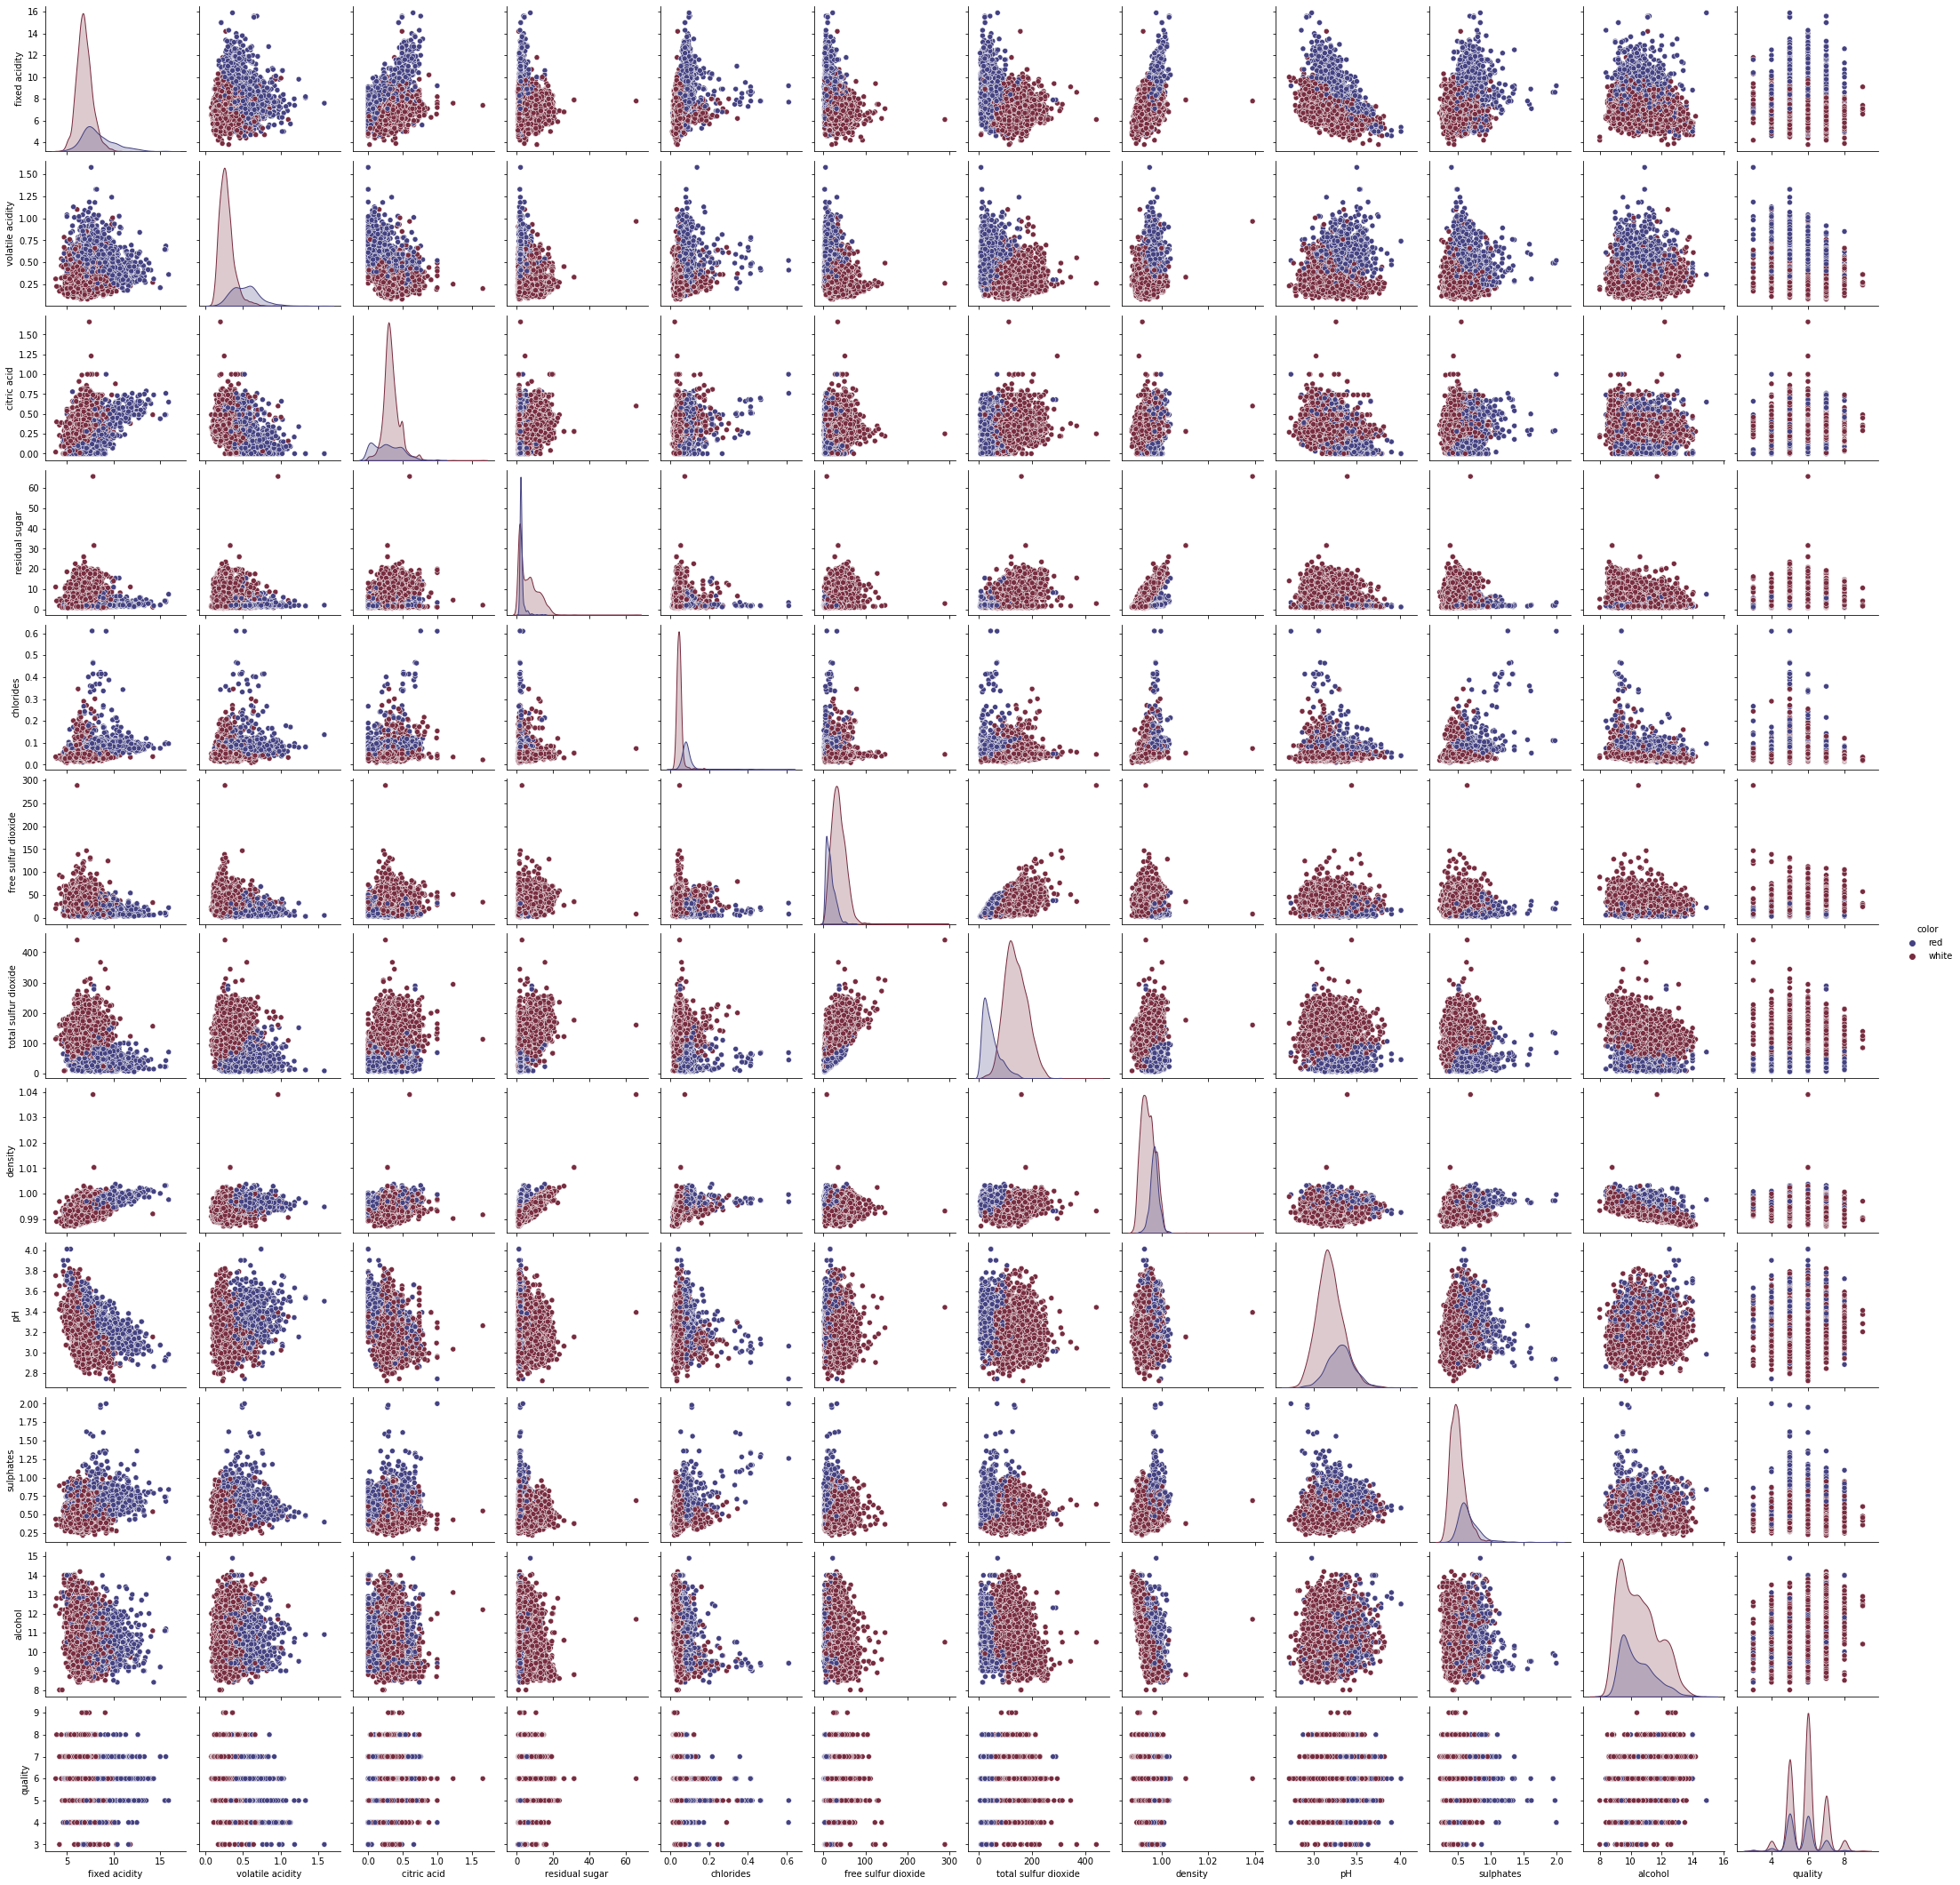

In [4]:
sns.pairplot(wine, hue="color",palette="icefire")


In [5]:
# We check if there are duplicates, we eliminate them as they can directly 
# influence the result we are going to obtain in our analysis.

wine[wine.duplicated(keep="last")]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
5,5.70,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,5.70,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6,white
6121,7.20,0.23,0.25,18.8,0.085,19.0,111.0,1.00044,3.10,0.51,8.7,5,white
6155,7.30,0.28,0.36,12.7,0.040,38.0,140.0,0.99800,3.30,0.79,9.6,6,white
6185,12.20,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5,red


In [6]:
wine.drop_duplicates(inplace=True)
wine.reset_index(drop=True, inplace=True)

In [7]:
#we isolate the target variable from the dependent features
x= wine[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']]
y=wine[['color']]

In [8]:
# machine learning algorithms work best with numbers, so we do a labelbinazer to transform
# red and white into 0 and 1. O=red 1=white
lb = preprocessing.LabelBinarizer()
y=lb.fit_transform(y)
y=pd.DataFrame(y, columns=["color"])

In [9]:
# Let's check how balanced is our data.
y.value_counts() / len(y)

color
1        0.744549
0        0.255451
dtype: float64

In [10]:
# partitioning of our data into train 70% validation 15% and test 15%. In this case we will not perform the cross validation 
# because we consider that we have enough data to avoid it.

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42,stratify = y)
X_val, X_test,y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42,stratify = y_test)

In [11]:
#let's explore our training data to build our model
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000
mean,7.206418,0.344015,0.319535,5.040669,0.056971,30.184479,114.117347,0.994517,3.224643,0.532140,10.550032,5.810687
std,1.309471,0.169485,0.149158,4.502696,0.037100,18.059198,56.782016,0.002971,0.160006,0.148978,1.179957,0.872404
min,3.900000,0.080000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,16.750000,75.000000,0.992200,3.117500,0.430000,9.500000,5.000000
50%,7.000000,0.297500,0.310000,2.700000,0.047000,28.000000,116.000000,0.994600,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.067000,41.000000,154.000000,0.996700,3.330000,0.600000,11.400000,6.000000
max,15.600000,1.580000,1.660000,65.800000,0.467000,289.000000,440.000000,1.038980,4.010000,1.980000,14.200000,9.000000


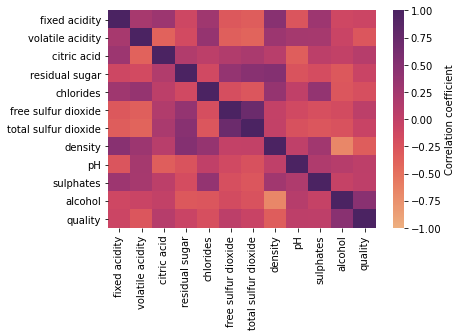

In [12]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, 
            annot=False,
            cbar_kws={"label": "Correlation coefficient", "shrink": 1, "ticks": np.linspace(-1, 1, 9)}, 
            cmap="flare", 
            vmin=-1, vmax=1)
plt.show()

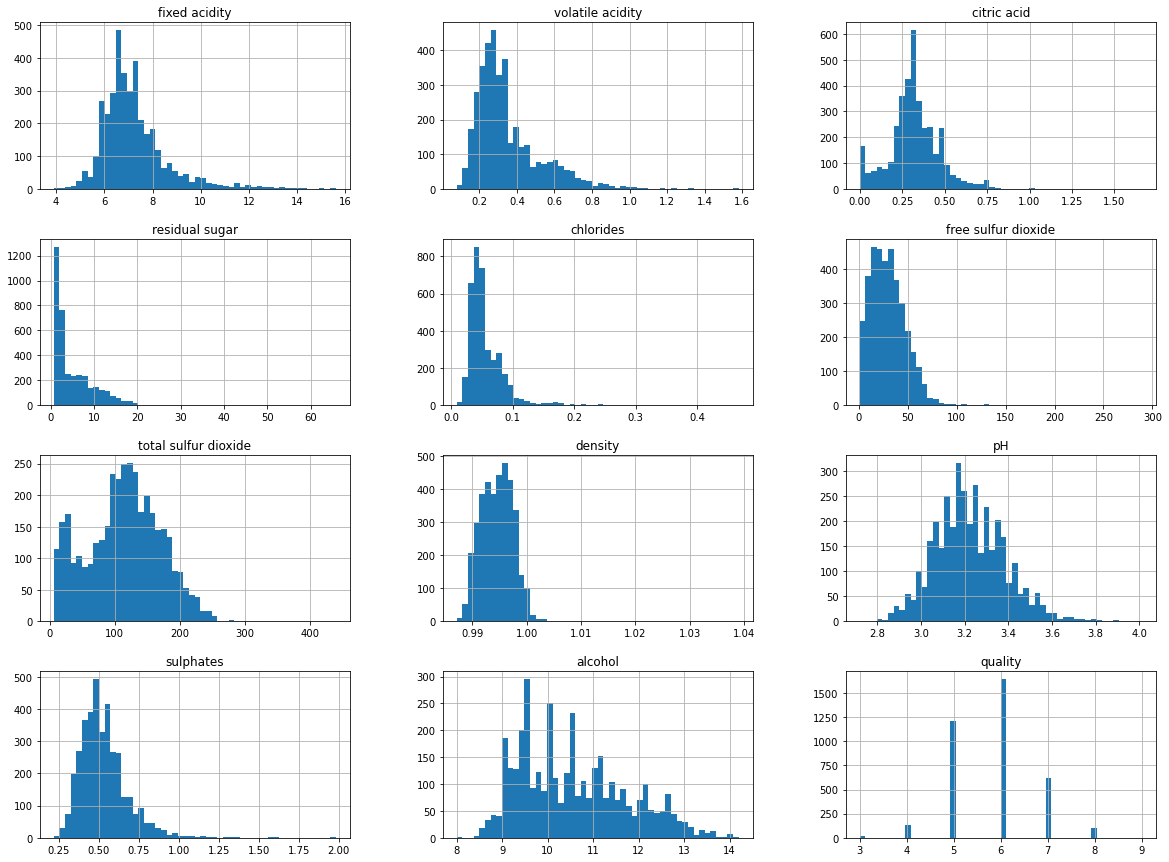

In [13]:
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In these first plots of our training set we see that most of the plots have a long tail on the right side of the plot, let's see if they are outliers. We are going to use the Z-score as a measure of outlier detection. The z-score is a measure of how far, in terms of standard deviations, an observation is from the mean. Our evaluation metric will be Z-scores of +3 or -3. 

In [14]:
#z-score for each feature

header = list(X_train)
for feat in header:
    try:
        z = stats.zscore(X_train[feat])
        print("feature: " + feat + ". Max z-score: " + str(z.max()) + ". Min z-score: " + str(z.min()))
    except TypeError:
        print("Can't calculate z-score for feature " + feat + ". It's "+ str(type(housing[feat].values[0])))
        pass 

feature: fixed acidity. Max z-score: 6.410763715591279. Min z-score: -2.5253417463999894
feature: volatile acidity. Max z-score: 7.293595239617217. Min z-score: -1.5579591387954859
feature: citric acid. Max z-score: 8.988084279720882. Min z-score: -2.142549392845969
feature: residual sugar. Max z-score: 13.495799905207203. Min z-score: -0.9641448325610152
feature: chlorides. Max z-score: 11.053460848234248. Min z-score: -1.2931822911643485
feature: free sulfur dioxide. Max z-score: 14.33343135131311. Min z-score: -1.6162621373239054
feature: total sulfur dioxide. Max z-score: 5.739958510890067. Min z-score: -1.9043329858355083
feature: density. Max z-score: 14.9698665130711. Min z-score: -2.4939329980737686
feature: pH. Max z-score: 4.908950097870091. Min z-score: -3.1543185485631797
feature: sulphates. Max z-score: 9.719936257827248. Min z-score: -2.0954946846360087
feature: alcohol. Max z-score: 3.093720945149857. Min z-score: -2.1614130817809185
feature: quality. Max z-score: 3.6562

In [15]:
a = stats.zscore(X_train['total sulfur dioxide'])
b = stats.zscore(X_train['pH'])
c = stats.zscore(X_train['alcohol'])

In [16]:
print(np.where(a>3))
print(np.where(b>3))
print(np.where(b<-3))
print(np.where(c>3))

(array([  85, 1088, 1114, 1553, 2892], dtype=int64),)
(array([   4,  199,  461,  497,  613,  730,  870,  976, 1125, 1346, 1421,
       1563, 2107, 2274, 2382, 2444, 2645, 3163, 3341, 3372, 3494, 3550],
      dtype=int64),)
(array([510], dtype=int64),)
(array([3217], dtype=int64),)


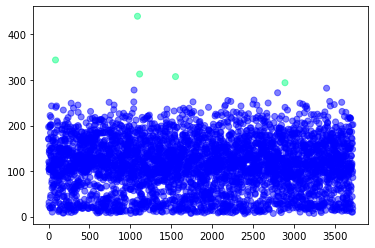

In [17]:
plt.scatter(np.arange(len(X_train)), X_train['total sulfur dioxide'], c=a>3, cmap=plt.get_cmap("winter"), alpha=0.5)

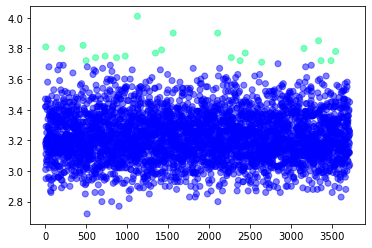

In [18]:
plt.scatter(np.arange(len(X_train)), X_train['pH'], c=b>3, cmap=plt.get_cmap("winter"), alpha=0.5)

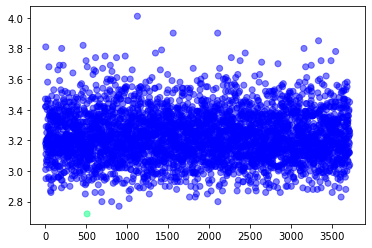

In [19]:
plt.scatter(np.arange(len(X_train)), X_train['pH'], c=b<-3, cmap=plt.get_cmap("winter"), alpha=0.5)

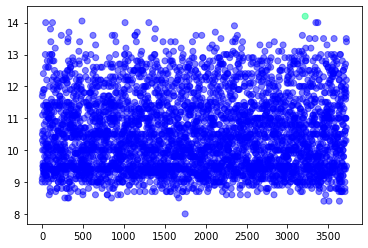

In [20]:
plt.scatter(np.arange(len(X_train)), X_train['alcohol'], c=c>3, cmap=plt.get_cmap("winter"), alpha=0.5)

In [21]:
#we transform the outlier with the average values
mean_a= X_train['total sulfur dioxide'].mean()
mean_b= X_train['pH'].mean()
mean_c= X_train['alcohol'].mean()

In [22]:
wine.loc[[85, 1088, 1114, 1553, 2892],['total sulfur dioxide']]=mean_a
wine.loc[[4,  199,  461,  497,  613,  730,  870,  976, 1125, 1346, 1421,
       1563, 2107, 2274, 2382, 2444, 2645, 3163, 3341, 3372, 3494, 3550],['pH']]=mean_b
wine.loc[[3217],['alcohol']]=mean_c

In [23]:
wine.loc[[85, 1088, 1114, 1553, 2892],['total sulfur dioxide']]

,total sulfur dioxide
85,114.117347
1088,114.117347
1114,114.117347
1553,114.117347
2892,114.117347


Apply feature scaling: we will do standard Scaler

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [25]:
y_train=y_train.to_numpy().ravel()
y_val=y_val.to_numpy().ravel()
y_test=y_test.to_numpy().ravel()

Machine Learning Clasificación: KNeighborsClassifier

In [40]:
val_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    val_scores.append(knn.score(X_val,y_val))

C:\Users\lmonc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lmonc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


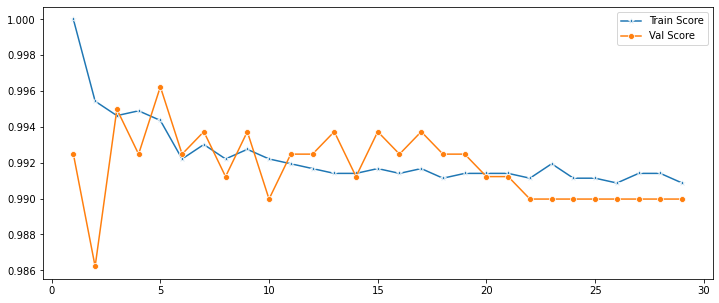

In [42]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),val_scores,marker='o',label='Val Score')

In [43]:
knn = KNeighborsClassifier(6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       204
           1       0.99      0.99      0.99       594

    accuracy                           0.99       798
   macro avg       0.99      0.99      0.99       798
weighted avg       0.99      0.99      0.99       798



Machine Learning Clasificación: Logistic regression

In [30]:
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_val_pred = logreg.predict(X_val)

In [32]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       204
           1       0.99      1.00      1.00       594

    accuracy                           1.00       798
   macro avg       1.00      0.99      1.00       798
weighted avg       1.00      1.00      1.00       798



In [33]:
y_pred = logreg.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       204
           1       0.99      1.00      0.99       594

    accuracy                           0.99       798
   macro avg       0.99      0.98      0.99       798
weighted avg       0.99      0.99      0.99       798

